In [1]:
import pkg_resources 
import pandas 
OutputDataSet = pandas.DataFrame(sorted([(i.key, i.version) for i in pkg_resources.working_set])) 
print(OutputDataSet)

                      0       1
0               absl-py   0.9.0
1               aiohttp   3.7.2
2             alabaster  0.7.12
3       anaconda-client   1.7.2
4    anaconda-navigator   1.9.7
..                  ...     ...
293                xlwt   1.3.0
294           xmltodict  0.12.0
295                yarl   1.6.2
296                zict   1.0.0
297                zipp   0.6.0

[298 rows x 2 columns]


# 모델링
    1. 데이터 파악 
    2. 데이터 전처리 (결측값, 명목변수 처리, 스케일링)
    3. 데이터 분리(train_test_split)
    4. 변수 선택 (Feature Selection)
    5. 모델 학습 (model_selection : cross_val, grid)
    6. 다양한 모델
    7. 성능 평가
---------
# 웹크롤링 (request, get, url)
# 자연어처리 (split, tf-idf)

In [201]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder

from sklearn.feature_selection import RFE, RFECV

from sklearn.datasets import load_iris,load_wine,load_boston

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import SGDRegressor,ElasticNet

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier,ExtraTreeRegressor

from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import StackingClassifier,StackingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor

from sklearn.svm import SVR,LinearSVR,SVC,LinearSVC

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.decomposition import PCA, NMF, SparsePCA, TruncatedSVD
from sklearn.decomposition import KernelPCA, FastICA, LatentDirichletAllocation

from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree, 

from sklearn.pipeline import make_pipeline

from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, roc_curve
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, GroupKFold
from sklearn.model_selection import train_test_split, cross_validate

In [213]:
a = pd.DataFrame([1,2,3])

In [216]:
a.to_csv('a.csv')

---

# 모델링
1. 데이터 파악

In [1]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('./data/check')

2. 데이터 전처리(결측값, 명목변수 처리, 스케일링)

In [77]:
data.isnull().sum()

0    1
dtype: int64

In [78]:
data.dropna()

,0
0,1.0
1,2.0
3,3.0


In [79]:
data.fillna(0)

,0
0,1.0
1,2.0
2,0.0
3,3.0


In [81]:
data.fillna(method='ffill')

,0
0,1.0
1,2.0
2,2.0
3,3.0


In [82]:
data.fillna({0:data[0].mean()})

,0
0,1.0
1,2.0
2,2.0
3,3.0


In [127]:
data = ['g','t','tg','d','d'] # Test 데이터 모두 합하여 진행 후 분리

In [123]:
one_hot_data = pd.get_dummies(data)

In [124]:
one_hot_data

,d,g,t,tg
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [6]:
data = pd.DataFrame(np.array([1,2,3,4,5]))

In [7]:
data

,0
0,1
1,2
2,3
3,4
4,5


In [8]:
data = np.array([[1],[2],[3],[4],[5]])

In [9]:
standardScaler_s = StandardScaler()

standardScaler_s.fit(data)

raw_df = standardScaler_s.transform(data)

In [10]:
RobustScaler_r = RobustScaler()

RobustScaler_r.fit(data)

raw_df = RobustScaler_r.transform(data)

In [11]:
MinMaxScaler_r = MinMaxScaler()

MinMaxScaler_r.fit(data)

raw_df = MinMaxScaler_r.transform(data)

3. 데이터 분리(train_test_split)

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
x_data = pd.DataFrame(np.array([[1,2],[3,4],[5,6],[7,8]]))

In [14]:
y_data = pd.DataFrame(np.array([1,2,3,4]))

In [15]:
x_data

,0,1
0,1,2
1,3,4
2,5,6
3,7,8


In [16]:
y_data

,0
0,1
1,2
2,3
3,4


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                    shuffle=False, 
                                   test_size=0.2)

4. 변수 선택(Feature Selection)

In [25]:
X = np.array([[1,2,3],[3,4,5]])

In [26]:
pd.DataFrame(X).corr()

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


In [27]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
print(selector.support_)

print(selector.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


5. 모델 학습

In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [4]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [5]:
clf.score(iris.data, iris.target)

0.9933333333333333

In [12]:
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

In [53]:
iris = datasets.load_iris()
parameters = {'max_depth':(5,10,15), 'learning_rate':[0.01, 0.1]}
svc = XGBClassifier()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [54]:
iris = datasets.load_iris()
modelv = XGBClassifier()
modelxv = modelv.fit(iris.data, iris.target)

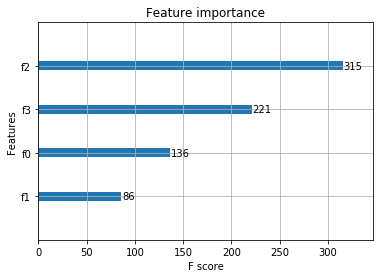

In [57]:
plot_importance(modelxv)

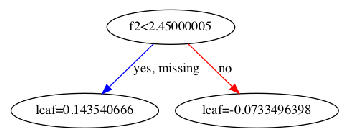

In [59]:
plot_tree(modelxv)

In [203]:
clf.score(iris.data, iris.target)

1.0

In [204]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5}

In [222]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()


In [223]:
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.33150734, 0.08022311, 0.03531764])

In [224]:
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])
print(scores['test_r2'])

[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]
[0.33150734 0.08022311 0.03531764]


In [279]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = LinearRegression()

In [280]:
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.49843203, 0.1037956 , 0.44394338])

In [281]:
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])
print(scores['test_r2'])

[-2727.7130097  -3481.76305373 -3524.64743077]
[0.515968   0.60652691 0.48251957]
[0.49843203 0.1037956  0.44394338]


### 성능 향상 시도 진행 (스케일링, 변수선택 등)

6. 다양한 모델

In [200]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder

from sklearn.datasets import load_iris,load_wine,load_boston

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import SGDRegressor,ElasticNet

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier,ExtraTreeRegressor

from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import StackingClassifier,StackingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor

from sklearn.svm import SVR,LinearSVR,SVC,LinearSVC

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.decomposition import PCA, NMF, SparsePCA, TruncatedSVD
from sklearn.decomposition import KernelPCA, FastICA, LatentDirichletAllocation

from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier, XGBRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, roc_curve
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, GroupKFold
from sklearn.model_selection import train_test_split, cross_validate




In [274]:
from sklearn.datasets import load_iris,load_wine,load_breast_cancer,load_boston,load_diabetes,load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import *

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [172]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

In [ ]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

In [174]:
df = pd.DataFrame(np.array([[1,23,2],[3,4,1]]))

In [176]:
model = PCA(n_components=2, random_state=0)
model.fit(df)
transformed_df = model.transform(df)
transformed_df.shape

(2, 2)

7. 성능평가


In [294]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [304]:
import numpy as np
from sklearn import metrics

y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

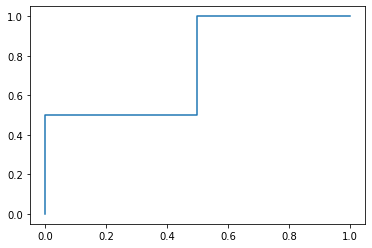

In [305]:
plt.plot(fpr,tpr)

In [297]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred, squared=False))

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(mean_squared_error(y_true, y_pred))

print(mean_squared_error(y_true, y_pred, squared=False))
print(mean_squared_error(y_true, y_pred, squared=True))

print(mean_squared_error(y_true, y_pred, multioutput='raw_values'))

print(mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7]))

0.375
0.6123724356957945
0.7083333333333334
0.8416254115301732
0.7083333333333334
[0.41666667 1.        ]
0.825


In [298]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5

In [300]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr)

print(tpr)

print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')


0.9913333333333334

# 웹크롤링 (request, get, url)

In [307]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import requests

In [309]:
url_query = quote(str(input('검색어 :')))
url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+url_query

j = int(input('원하는 검색 페이지수 :'))
print()

df_title_list = []
df_company_list = []
df_url_list = []

for i in range(j):
    
    search_url = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(search_url, 'html.parser')

    check = soup.find_all('div', {'class':'news_area'})

    for i in range(len(check)):
        a = check[i].find('a',{'class':'news_tit'})['title']
        b = check[i].find('a',{'class':'info press'}).text
        c = check[i].find('a',{'class':'news_tit'})['href']
#         print('news_title = ', a)
#         print('news_compant = ', b)
#         print('news_url = ', c)
        
        df_title_list.append(a)
        df_company_list.append(b)
        df_url_list.append(c)
        
    try:
        ab = soup.find('a',{'class':'btn_next'}).get('href')
        url = 'https://search.naver.com/search.naver' + ab
    except:
        break
    
#     print()
    
news_df_frame = pd.DataFrame([df_company_list, df_title_list, df_url_list],index=['company', 'title', 'url'])
news_df_frame = news_df_frame.T

news_df_frame

검색어 :ㄴㄴ
원하는 검색 페이지수 :1



,company,title,url
0,헤럴드POP,"'홍현희♥'제이쓴, 요요無 다이어트 비결 ""짱배고플 때 자몽 먹음""",http://biz.heraldcorp.com/view.php?ud=20210525...
1,교수신문,"갑순이가 아니라,",http://www.kyosu.net/news/articleView.html?idx...
2,조선일보,"[이수연 PD의 방송 이야기] ㄴㄴ·RG?… 방송 자막, 반성합니다",https://www.chosun.com/culture-life/culture_ge...
3,디지털데일리,‘딥빡’ ‘가리지널’ ‘ㄴㄴ’…한글파괴 예능에 세종대왕 노하실라,http://www.ddaily.co.kr/news/article.html?no=2...
4,헤럴드POP,"아유미, 캠핑 즐기는 라이프..""사소한 것에 감동, 나이든 거 아님""",http://biz.heraldcorp.com/view.php?ud=20210520...
5,뉴시스,"이마트 노브랜드, 필리핀에 5호점 선보인다",http://www.newsis.com/view/?id=NISX20210427_00...
6,전국매일신문,[나랏말싸미] 전세값·전셋값? 알쏭달쏭 사이시옷 이렇게!,http://www.jeonmae.co.kr/news/articleView.html...
7,헬로디디,"[우주브리핑] ""중국, 로켓관리 제대로 안해?""",https://www.hellodd.com/news/articleView.html?...
8,뉴스웨이,"삐삐밴드·몬스타엑스 주헌 ‘ㅈㄱㅈㄱ’-‘ㄴㄴ’, 자음으로 된 곡제목이 유행?",http://www.newsway.co.kr/view.php?tp=1&ud=2015...
9,동아일보,"주헌, ‘ㄴㄴ’ 공개…“어떤 듣보잡 아이돌 랩퍼와의 콜라보“",http://news.donga.com/3/all/20150501/71020935/1


# 자연어처리 (split, tf-idf)

In [209]:
from sklearn.feature_selection import RFE, RFECV

In [208]:
import sklearn.feature_selection
dir(sklearn.feature_selection)

['GenericUnivariateSelect',
 'RFE',
 'RFECV',
 'SelectFdr',
 'SelectFpr',
 'SelectFromModel',
 'SelectFwe',
 'SelectKBest',
 'SelectPercentile',
 'VarianceThreshold',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_from_model',
 '_mutual_info',
 '_rfe',
 '_univariate_selection',
 '_variance_threshold',
 'chi2',
 'f_classif',
 'f_oneway',
 'f_regression',
 'mutual_info_classif',
 'mutual_info_regression']

In [315]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [316]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 기타(Scipy)

In [321]:
from scipy.optimize import fmin_bfgs
import scipy

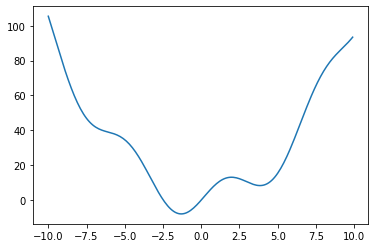

In [311]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

In [312]:
fmin_bfgs( f, 0 )

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

In [314]:
fmin_bfgs( f, 5 )

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([3.83746711])

# Matplotlib

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline



In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

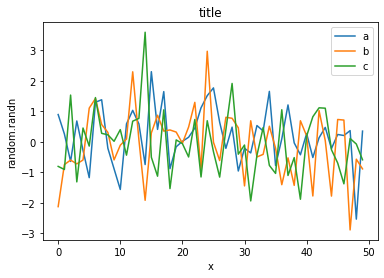

In [19]:
plt.plot(np.random.randn(50),label='a')
plt.plot(np.random.randn(50),label='b')
plt.plot(np.random.randn(50),label='c')
plt.title('title')
plt.xlabel('x')
plt.ylabel('random.randn')
plt.legend()

Text(0.5, 0, 'group')

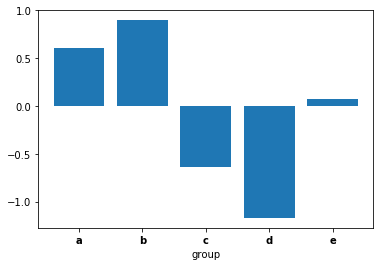

In [20]:
height = [np.random.randn() * i for i in range(1,6)]
names = ['a','b','c','d','e']
y_pos = np.arange(len(names))
plt.bar(y_pos,height)
plt.xticks(y_pos,names,fontweight='bold')
plt.xlabel('group')

Text(0, 0.5, 'coherernece')

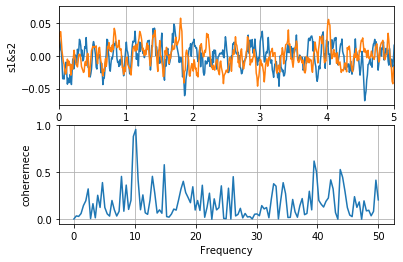

In [31]:
# plt.subplots_adjust(wspace=1)

dt=0.01
t = np.arange(0,30,dt)
n1 = np.random.randn(len(t))
n2 = np.random.randn(len(t))
r = np.exp(-t/0.05)

c1 = np.convolve(n1,r,mode='same')*dt
c2 = np.convolve(n2,r,mode='same')*dt

s1 = 0.01*np.sin(2*np.pi*10*t)+c1
s2 = 0.01*np.sin(2*np.pi*10*t)+c2

plt.subplot(211)
plt.plot(t,s1,t,s2)
plt.xlim(0,5)
plt.xlabel('time')
plt.ylabel('s1&s2')
plt.grid(True)

plt.subplot(212)
plt.cohere(s1,s2,256,1./dt)
plt.ylabel('coherernece')

---

---

---

In [239]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder

from sklearn.feature_selection import RFE, RFECV

from sklearn.datasets import load_iris,load_wine,load_boston

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import SGDRegressor,ElasticNet

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier,ExtraTreeRegressor

from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import StackingClassifier,StackingRegressor
from sklearn.ensemble import VotingClassifier,VotingRegressor

from sklearn.svm import SVR,LinearSVR,SVC,LinearSVC

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.decomposition import PCA, NMF, SparsePCA, TruncatedSVD
from sklearn.decomposition import KernelPCA, FastICA, LatentDirichletAllocation

from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.pipeline import make_pipeline

from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, roc_curve
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, GroupKFold
from sklearn.model_selection import train_test_split, cross_validate

In [240]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either esti

In [246]:
from bs4 import BeautifulSoup
import requests
import urllib.request


url = 'https://www.google.com/'
# print(help(urllib3.request))

url = urllib.request.urlopen(url)
sss = BeautifulSoup(url,'html.parser')
a = sss.find_all('a',{'class':'gb1'})
print(a)

[<a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a>, <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a>, <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a>, <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a>, <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a>, <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>, <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a>, <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a>]
